Kako so cepiva vplivala na število Covid okužb?

In [1]:
import pandas as pd
age_cases = pd.read_csv("csv/age-cases.csv")
age_cases = age_cases.fillna(0)

age_vacc = pd.read_csv("csv/vaccination-by_age.csv")

age_vacc = age_vacc.fillna(0)


age_cases
age_vacc



,date,vaccination.age.0-11.1st.todate,vaccination.age.0-11.2nd.todate,vaccination.age.0-11.3rd.todate,vaccination.age.12-17.1st.todate,vaccination.age.12-17.2nd.todate,vaccination.age.12-17.3rd.todate,vaccination.age.18-24.1st.todate,vaccination.age.18-24.2nd.todate,vaccination.age.18-24.3rd.todate,...,vaccination.age.75-79.3rd.todate,vaccination.age.80-84.1st.todate,vaccination.age.80-84.2nd.todate,vaccination.age.80-84.3rd.todate,vaccination.age.85-89.1st.todate,vaccination.age.85-89.2nd.todate,vaccination.age.85-89.3rd.todate,vaccination.age.90+.1st.todate,vaccination.age.90+.2nd.todate,vaccination.age.90+.3rd.todate
0,2020-12-27,0.0,0.0,0.0,0.0,0.0,0.0,13,0.0,0.0,...,0.0,915,0.0,0.0,1231,0.0,0.0,1639,0.0,0.0
1,2020-12-28,0.0,0.0,0.0,0.0,0.0,0.0,23,0.0,0.0,...,0.0,1089,0.0,0.0,1482,0.0,0.0,1909,0.0,0.0
2,2020-12-29,0.0,0.0,0.0,0.0,0.0,0.0,35,0.0,0.0,...,0.0,1156,0.0,0.0,1558,0.0,0.0,1987,0.0,0.0
3,2020-12-30,0.0,0.0,0.0,0.0,0.0,0.0,40,0.0,0.0,...,0.0,1174,0.0,0.0,1568,0.0,0.0,1996,0.0,0.0
4,2020-12-31,0.0,0.0,0.0,1.0,0.0,0.0,57,0.0,0.0,...,0.0,1211,0.0,0.0,1584,0.0,0.0,2025,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,2022-03-27,2404.0,1775.0,4.0,38865.0,36443.0,749.0,86393,82040.0,23058.0,...,51179.0,54741,53805.0,40626.0,33288,32464.0,23324.0,17559,16839.0,10878.0
456,2022-03-28,2404.0,1775.0,4.0,38867.0,36445.0,759.0,86395,82045.0,23084.0,...,51184.0,54742,53805.0,40633.0,33288,32464.0,23329.0,17559,16839.0,10878.0
457,2022-03-29,2404.0,1775.0,4.0,38870.0,36450.0,776.0,86397,82052.0,23121.0,...,51189.0,54742,53808.0,40643.0,33288,32465.0,23332.0,17559,16839.0,10878.0
458,2022-03-30,2406.0,1781.0,4.0,38873.0,36460.0,791.0,86401,82055.0,23163.0,...,51211.0,54742,53808.0,40660.0,33288,32467.0,23340.0,17560,16840.0,10882.0


Za ugotavljanje delovanja cepiv, bomo primerjali podatke o cepljenih in o zbolelih po starostnih skupinah. Tabeli, ki ju bomo uporabili so vaccination-by_age.csv in age-cases.csv. V tabeli age-cases imamo za vsak dan od 2020-03-04 navedena števila okužb razdeljena po starosti ter spolu. 
V tabeli vaccination-by_age pa imamo števila cepljenih po starostnih skupinah.
Obe tabeli pa imata različno razporeditev let v starostnih skupinah, zato bomo naredili nove starostne skupine ter podatke v tableah združili.
Ker tabele vsebujejo število vseh odkritih okužb do danega datuma, bomo naredili 'odvod'-gledali bomo 14 dnevno spremembo stanja tako za okužbe kot za cepiva.

In [2]:
list_ages = ["0-24", "25-44", "45-64", "65-84", "85+"]
age_cases_new = pd.DataFrame()

age_cases_new["0-24"] = age_cases["age.0-4.todate"] + age_cases["age.5-14.todate"] + age_cases["age.15-24.todate"]
age_cases_new["25-44"] = age_cases["age.25-34.todate"] + age_cases["age.35-44.todate"]
age_cases_new["45-64"] = age_cases["age.45-54.todate"] + age_cases["age.55-64.todate"]
age_cases_new["65-84"] = age_cases["age.65-74.todate"] + age_cases["age.75-84.todate"]
age_cases_new["85+"] = age_cases["age.85+.todate"]
age_cases_new["sum"] = sum(age_cases_new[attr] for attr in list(age_cases_new)[1:])

age_cases_new = age_cases_new.diff(7)
age_cases_new["date"] = age_cases["date"]

age_cases_new


,0-24,25-44,45-64,65-84,85+,sum,date
0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-04
1,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05
2,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06
3,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-07
4,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-08
...,...,...,...,...,...,...,...
753,4955.0,6212.0,5959.0,2341.0,288.0,14800.0,2022-03-27
754,4620.0,6046.0,5775.0,2471.0,300.0,14592.0,2022-03-28
755,4380.0,5978.0,5723.0,2492.0,311.0,14504.0,2022-03-29
756,4143.0,5794.0,5585.0,2485.0,322.0,14186.0,2022-03-30


In [3]:
attrs_age_vacc[34:46]

NameError: name 'attrs_age_vacc' is not defined

In [ ]:
age_vacc_new = pd.DataFrame()
attrs_age_vacc = list(age_vacc)


age_vacc_new["0-24"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[1:10] if "1st" in i])
age_vacc_new["25-44"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[10:22] if "1st" in i])
age_vacc_new["45-64"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[22:34] if "1st" in i])
age_vacc_new["65-84"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[34:46] if "1st" in i])
age_vacc_new["85+"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[46:] if "1st" in i])
age_vacc_new["sum"] = sum(age_vacc_new[attr] for attr in list(age_vacc_new)[1:])
#age_vacc_new = age_vacc_new.diff(7)
age_vacc_new["date"] = age_vacc["date"]
age_vacc_new


,0-24,25-44,45-64,65-84,85+,sum,date
0,13.0,296,921,2099,2870,6186,2020-12-27
1,23.0,527,1409,2535,3391,7862,2020-12-28
2,35.0,800,1985,2846,3545,9176,2020-12-29
3,40.0,933,2182,2914,3564,9593,2020-12-30
4,58.0,1548,3179,3097,3609,11433,2020-12-31
...,...,...,...,...,...,...,...
455,127662.0,320594,435108,330407,50847,1136956,2022-03-27
456,127666.0,320600,435112,330410,50847,1136969,2022-03-28
457,127671.0,320607,435117,330410,50847,1136981,2022-03-29
458,127680.0,320623,435125,330412,50848,1137008,2022-03-30


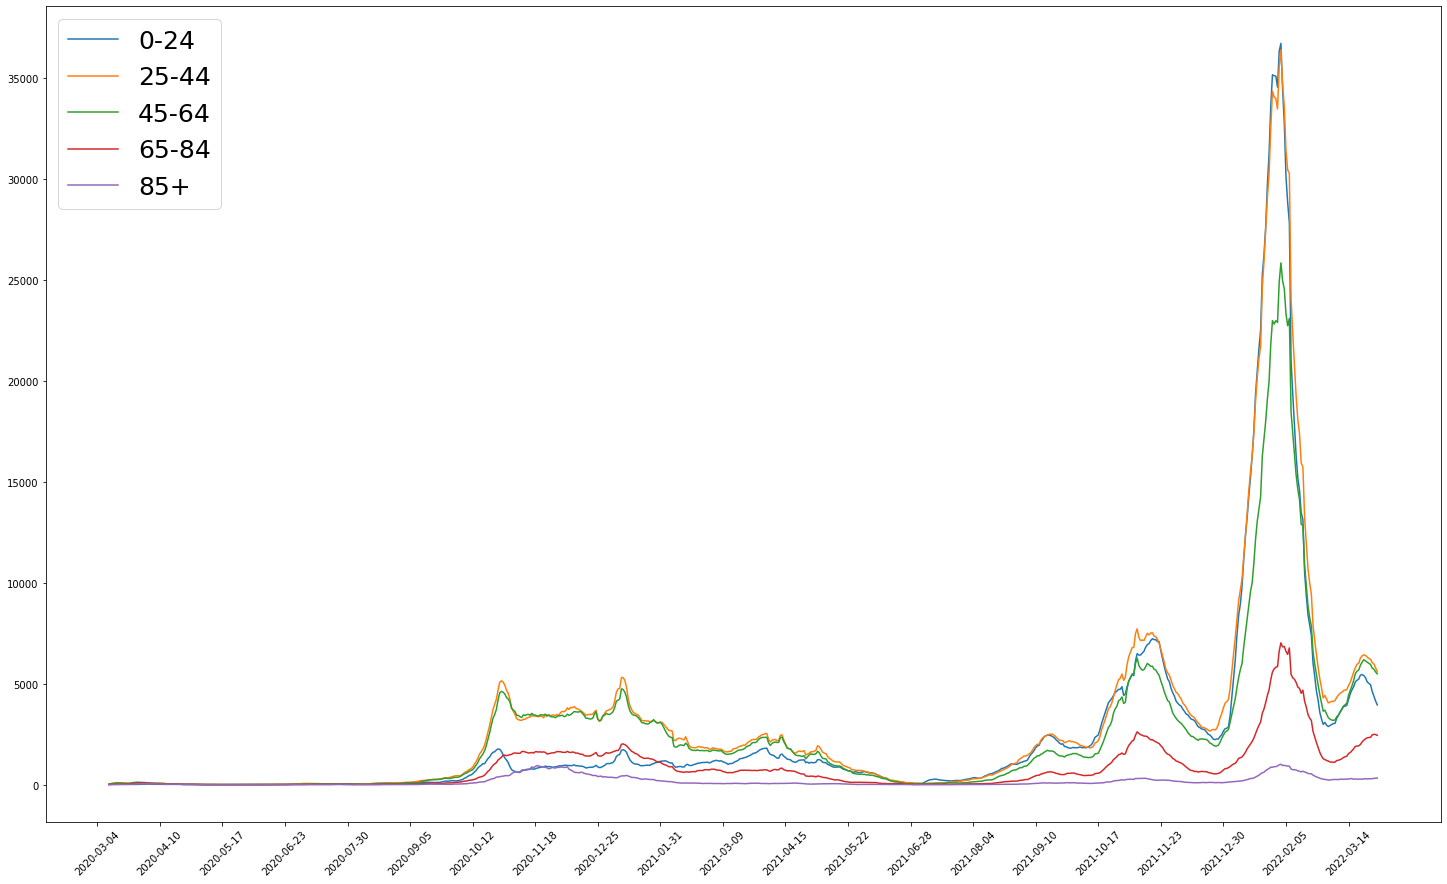

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(25,15))
plt.plot(age_cases_new["date"], age_cases_new["0-24"], label="0-24")
plt.plot(age_cases_new["date"], age_cases_new["25-44"], label="25-44")
plt.plot(age_cases_new["date"], age_cases_new["45-64"], label="45-64")
plt.plot(age_cases_new["date"], age_cases_new["65-84"], label="65-84")
plt.plot(age_cases_new["date"], age_cases_new["85+"], label="85+")
plt.legend(loc="upper left", prop={'size': 25})
plt.xticks(range(0, len(age_cases_new), len(age_cases_new)//20), rotation=45)

plt.show()

Da bi dobili realnejšo sliko o okužbah po starostnih skupinah, je potrebno upoštevati tudi samo populacijo posamezne starostne skupine.

0-24, 515336
25-44, 558535
45-64, 599391
65-84, 381140
85+, 54575


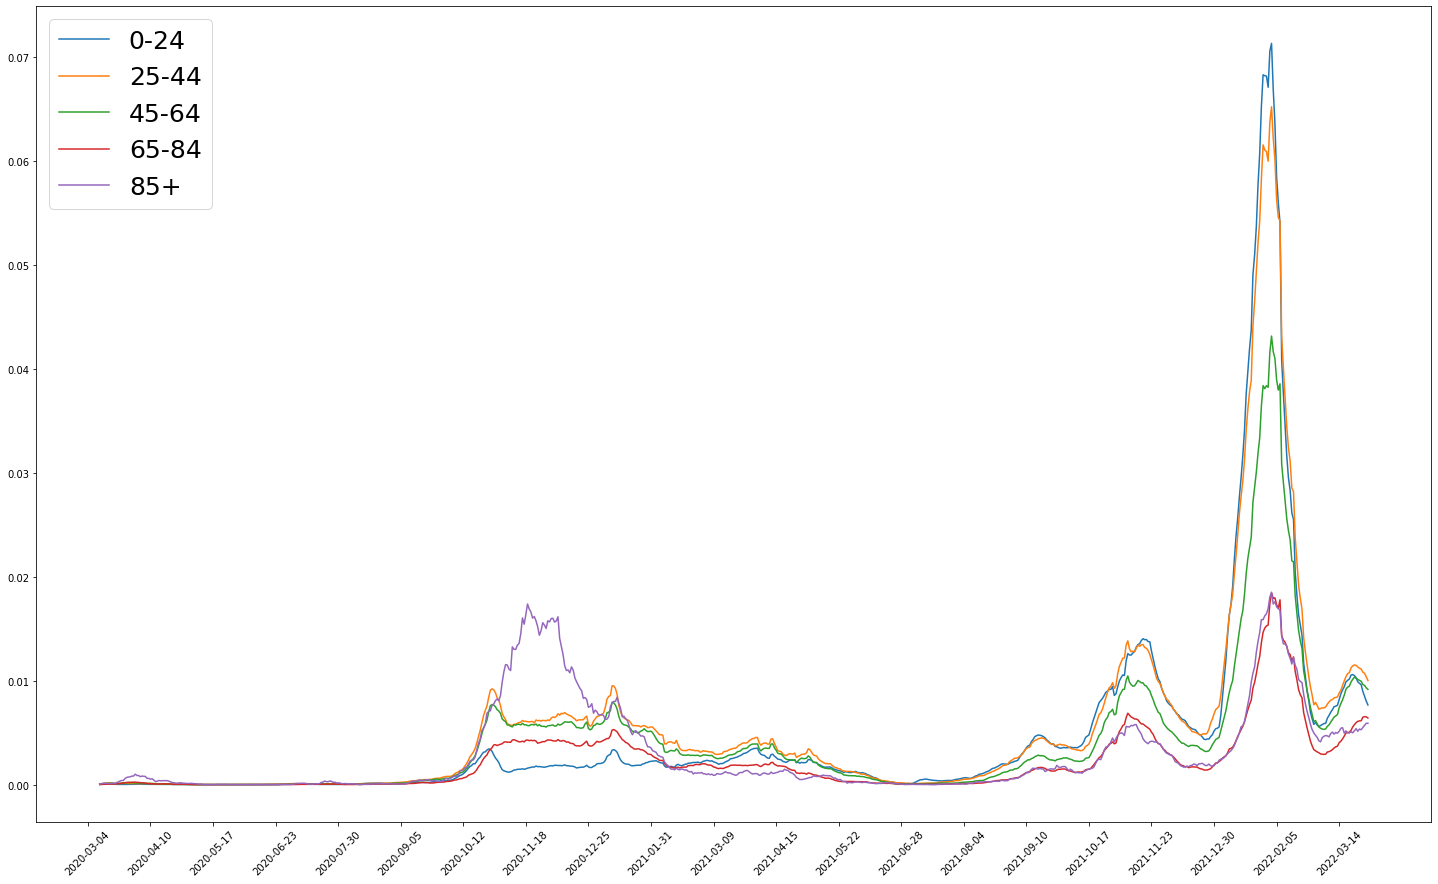

In [ ]:
from csv import DictReader
population_age_dr = DictReader(open("csv/dict-age-groups.csv", "rt"))
population_age_temp = dict()
population_age = dict()

for i in population_age_dr:
    population_age_temp[i["id"]] = i["population"]

population_age["0-24"] = int(population_age_temp["0-4"]) + int(population_age_temp["5-14"]) + int(population_age_temp["15-24"])
population_age["25-44"] = int(population_age_temp["25-34"]) + int(population_age_temp["35-44"])
population_age["45-64"] = int(population_age_temp["45-54"]) + int(population_age_temp["55-64"])
population_age["65-84"] = int(population_age_temp["65-74"]) + int(population_age_temp["75-84"])
population_age["85+"] = int(population_age_temp["85+"])

age_cases_relative = pd.DataFrame()
age_cases_relative["date"] = age_cases_new["date"]

for i in list_ages:
    print("{}, {}".format(i, population_age[i]))
    age_cases_relative[i] = age_cases_new[i].div(population_age[i])


plt.figure(figsize=(25,15))

for i in list_ages:
    plt.plot(age_cases_relative["date"], age_cases_relative[i], label=i)
plt.xticks(range(0, len(age_cases_relative), len(age_cases_relative)//20), rotation=45)


plt.legend(loc="upper left", prop={'size': 25})
plt.show()



Sedaj vidimo, da se je graf precej spremenil - vidimo da so v najstarejši starostni skupini ob prvem valu najbolj zbolevali, najmanjši delež bolanih pa je bilo v najmlajši starostni skupini.

Poglejmo še kako so se v posameznih starostnih skupinah ljudje cepili.

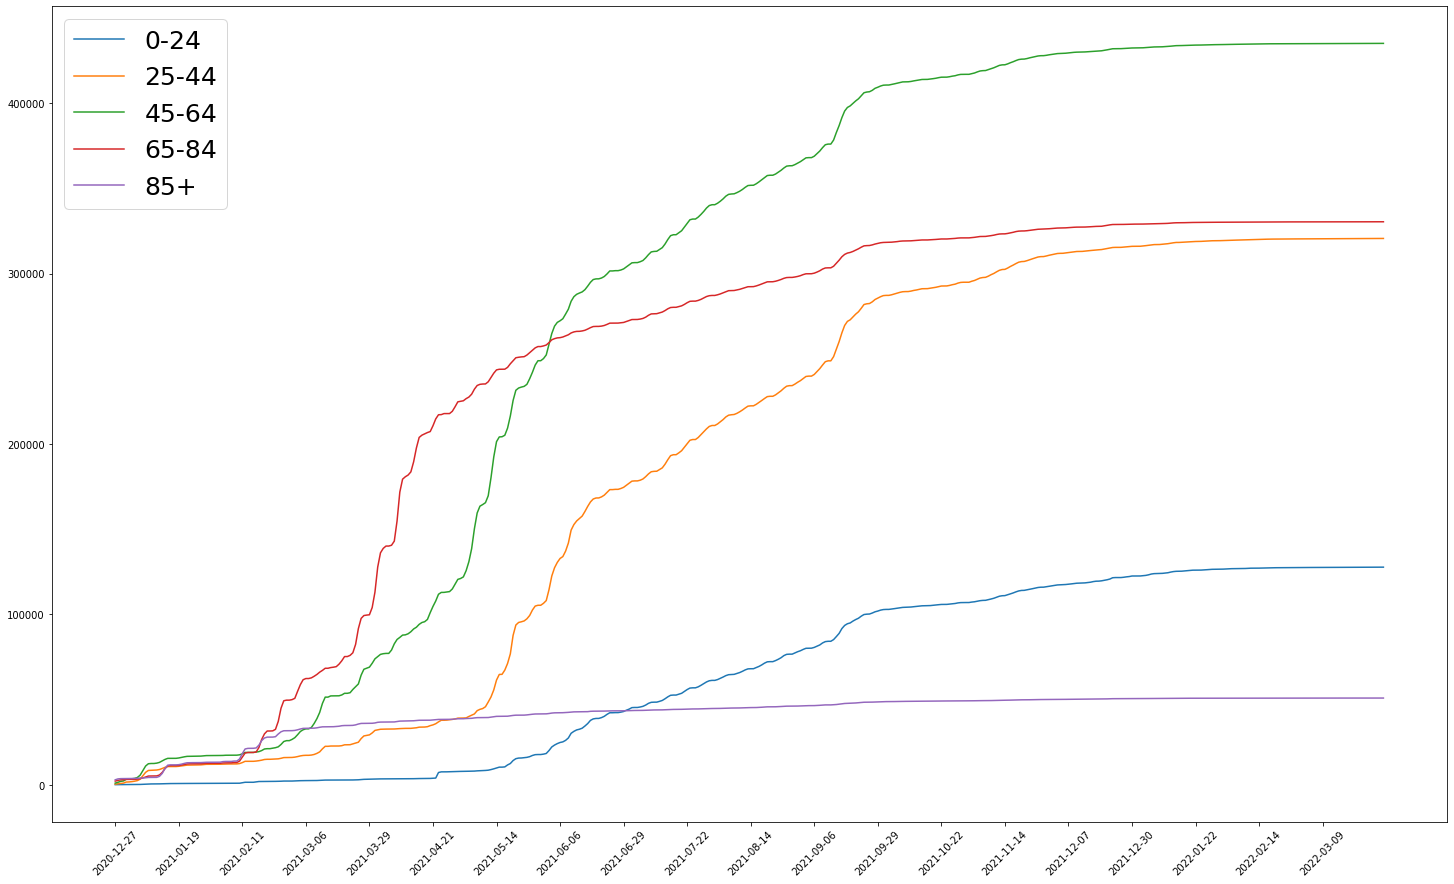

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(age_vacc_new["date"], age_vacc_new["0-24"], label="0-24")
plt.plot(age_vacc_new["date"], age_vacc_new["25-44"], label="25-44")
plt.plot(age_vacc_new["date"], age_vacc_new["45-64"], label="45-64")
plt.plot(age_vacc_new["date"], age_vacc_new["65-84"], label="65-84")
plt.plot(age_vacc_new["date"], age_vacc_new["85+"], label="85+")
plt.legend(loc="upper left", prop={'size': 25})
plt.xticks(range(0, len(age_vacc_new), len(age_vacc_new)//20), rotation=45)
plt.show()

Podobno kot prej, je problem, da starostne skupine z večjo populacijo večjo moč, zato vzemimo to v zakup.
Ponovno delimo s skupnim številom populacije.

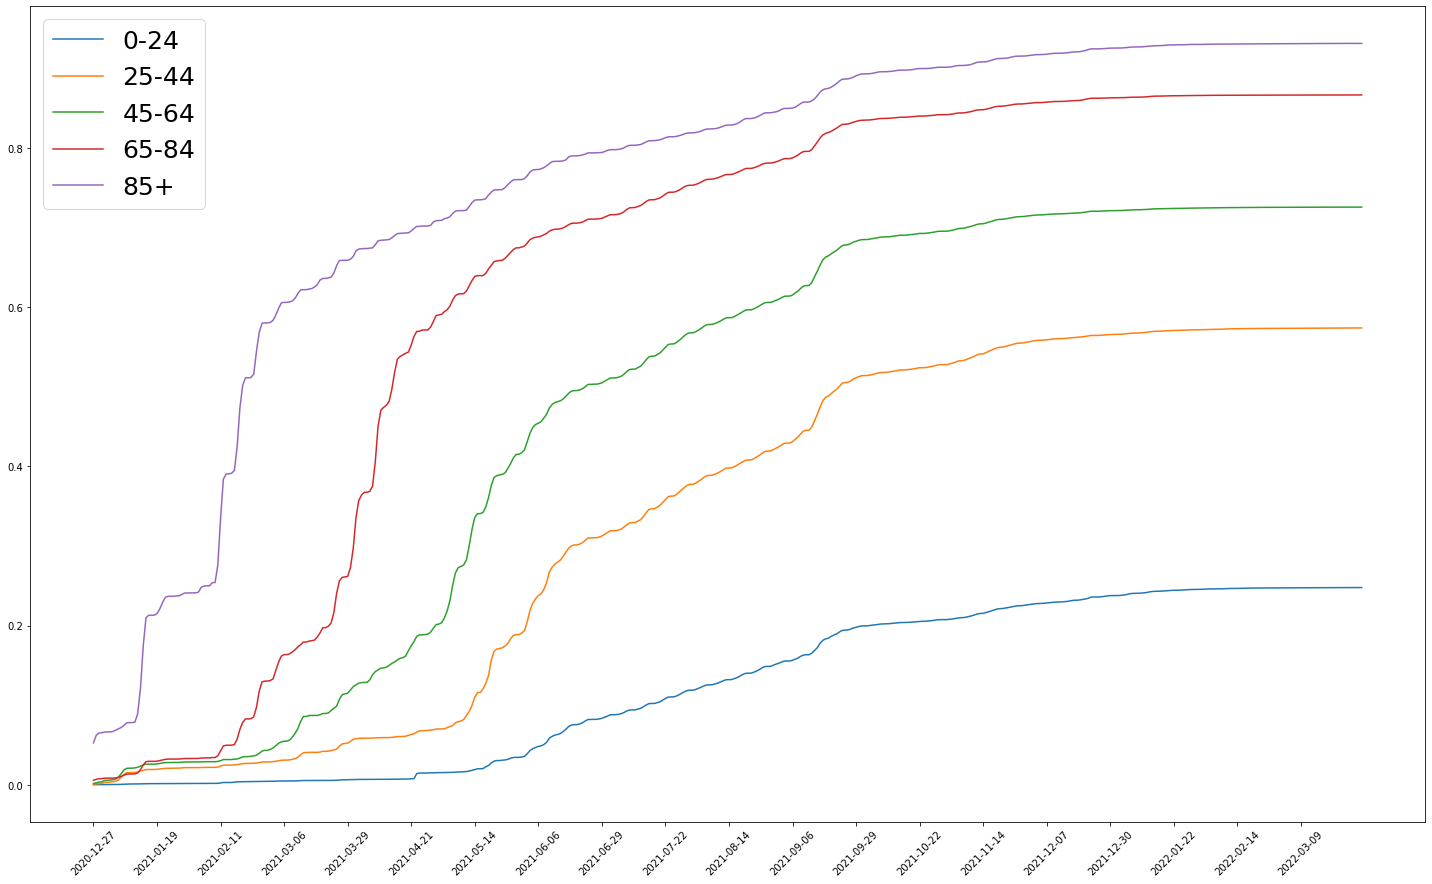

In [ ]:
age_vacc_relative = pd.DataFrame()
age_vacc_relative["date"] = age_vacc_new["date"]

for i in list_ages:
    age_vacc_relative[i] = age_vacc_new[i].div(population_age[i])

plt.figure(figsize=(25,15))

for i in list_ages:
    plt.plot(age_vacc_relative["date"], age_vacc_relative[i], label=i)

plt.xticks(range(0, len(age_vacc_relative), len(age_vacc_relative)//20), rotation=45)

plt.legend(loc="upper left", prop={'size': 25})
plt.show()


date                                2022-03-31
vaccination.age.0-11.1st.todate         2406.0
vaccination.age.0-11.2nd.todate         1781.0
vaccination.age.0-11.3rd.todate            4.0
vaccination.age.12-17.1st.todate       38873.0
vaccination.age.12-17.2nd.todate       36461.0
vaccination.age.12-17.3rd.todate         791.0
vaccination.age.18-24.1st.todate         86401
vaccination.age.18-24.2nd.todate       82055.0
vaccination.age.18-24.3rd.todate       23164.0
vaccination.age.25-29.1st.todate         63704
vaccination.age.25-29.2nd.todate       60620.0
vaccination.age.25-29.3rd.todate       18826.0
vaccination.age.30-34.1st.todate         72145
vaccination.age.30-34.2nd.todate       68505.0
vaccination.age.30-34.3rd.todate       21592.0
vaccination.age.35-39.1st.todate         84290
vaccination.age.35-39.2nd.todate       79971.0
vaccination.age.35-39.3rd.todate       27601.0
vaccination.age.40-44.1st.todate        100486
vaccination.age.40-44.2nd.todate       95552.0
vaccination.a

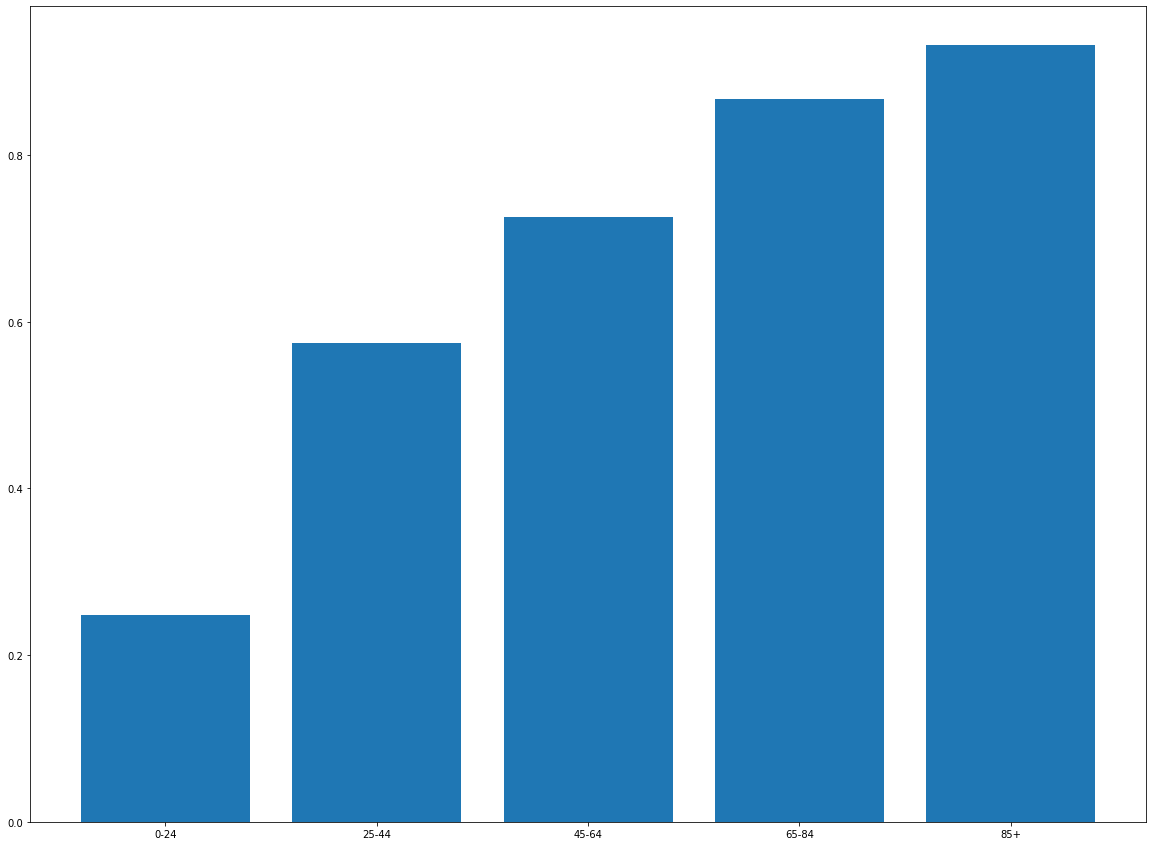

In [ ]:
plt.figure(figsize=(20,15))

plt.bar(list_ages, [age_vacc_relative[sk].iloc[-1] for sk in list_ages])
print(age_vacc.iloc[-1])
#age_vacc_relative["65-84"].iloc[-1]


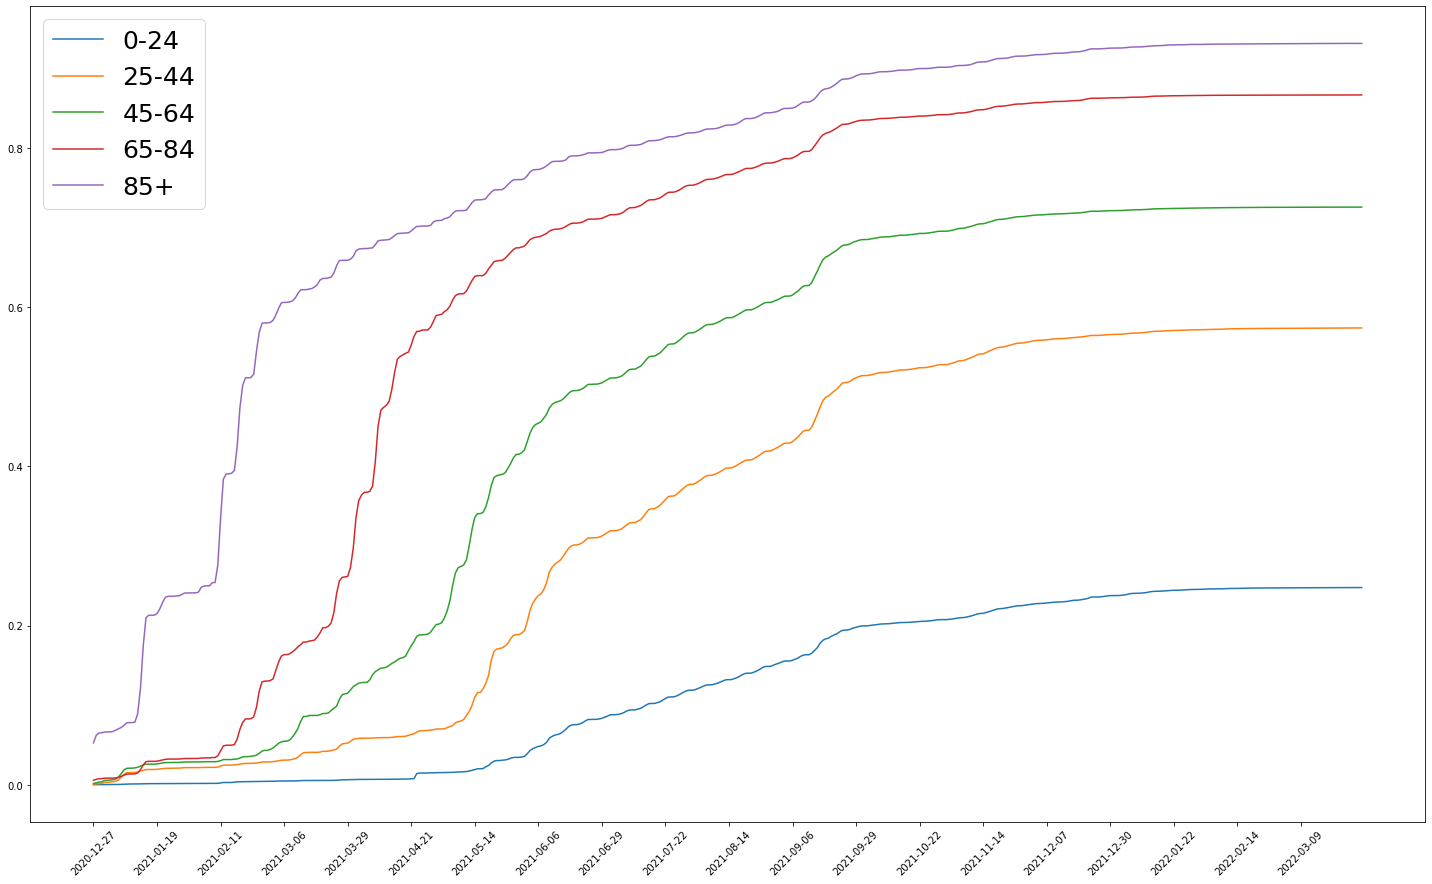

In [ ]:
age_vacc_new2 = pd.DataFrame()
age_vacc_new2["0-24"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[1:10] if "1st" in i])
age_vacc_new2["25-44"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[10:22] if "1st" in i])
age_vacc_new2["45-64"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[22:34] if "1st" in i])
age_vacc_new2["65-84"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[34:64] if "1st" in i])
age_vacc_new2["85+"] = sum(age_vacc[attr] for attr in [i for i in attrs_age_vacc[46:] if "1st" in i])

plt.figure(figsize=(25,15))

for i in list_ages:
    plt.plot(age_vacc_relative["date"], age_vacc_relative[i], label=i)

plt.xticks(range(0, len(age_vacc_relative), len(age_vacc_relative)//20), rotation=45)

plt.legend(loc="upper left", prop={'size': 25})
plt.show()

Tukaj lahko vidimo, kako je država izvajala plan ceplenja - starejši ljudje so bili prvi na vrsti, nato pa čedalje mlajši.
Da pa lahko pogledamo ali je cepljenje pripomoglo k zmanjšanju okužb, moramo primerjati podatke. Da bi dobili realno sliko, pa moramo gledati okužbe relativno na število izvedenih testov.

Poglejmo si, kako se je spreminjal delež pozitivnih testov.

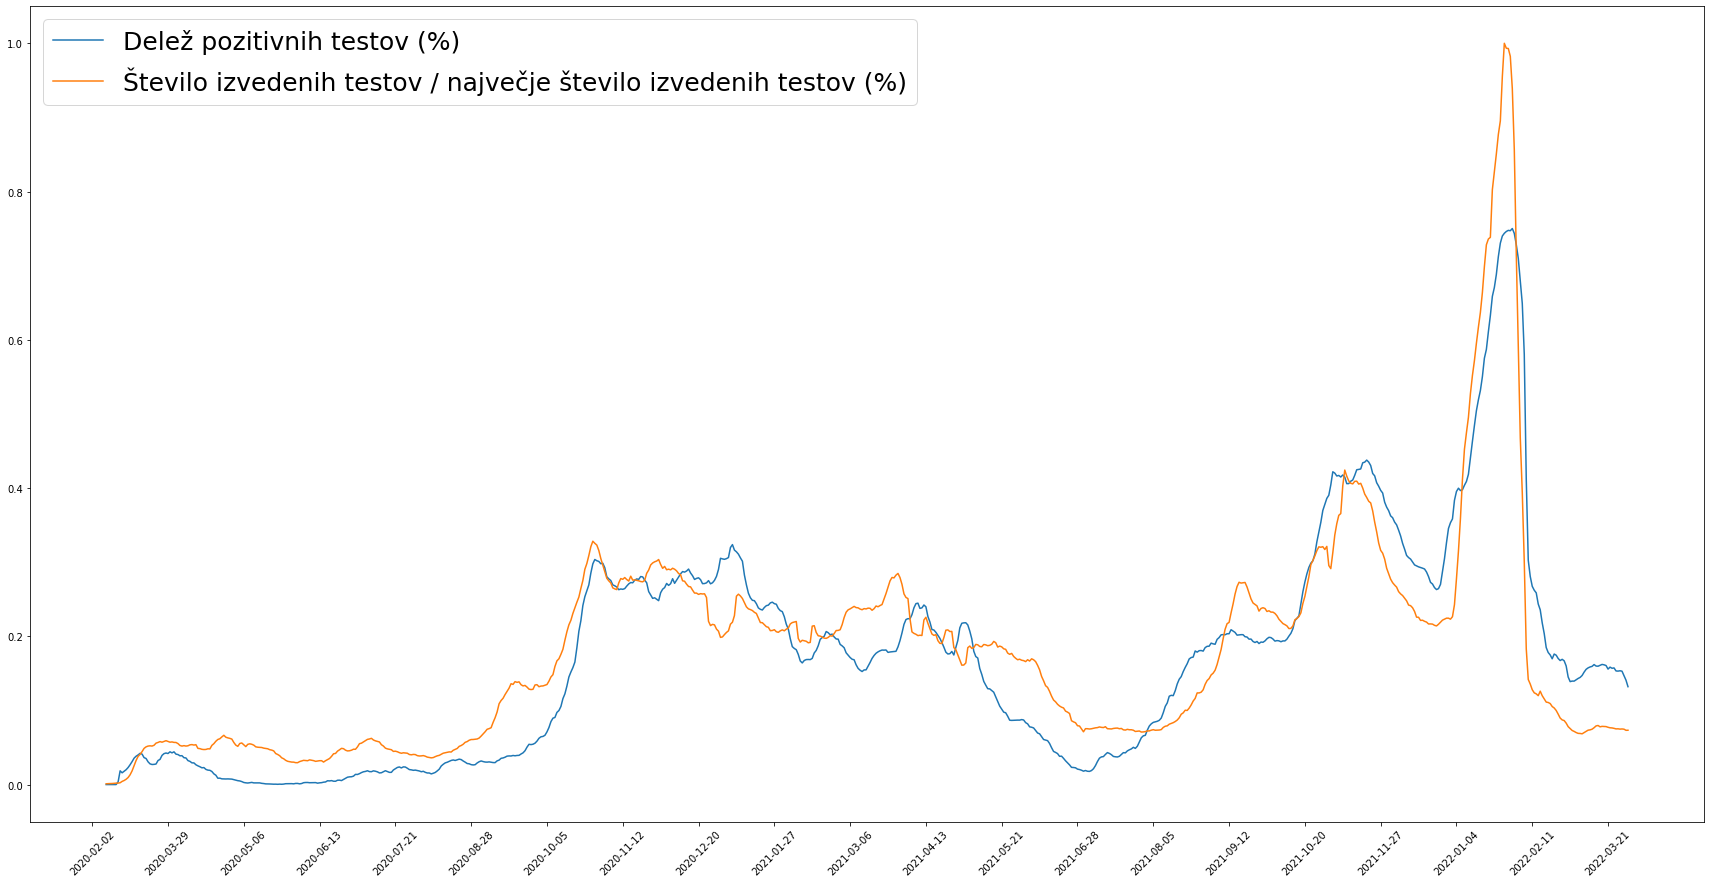

In [ ]:
test_no_df = pd.read_csv("csv/lab-tests.csv")
test_no_df = test_no_df.fillna(0)
test_no_df["test.relative.positive"] = test_no_df["tests.positive.todate"].diff(7).div(test_no_df["tests.performed.todate"].diff(7))
test_no_df["test.performed.7days"] = test_no_df["tests.performed.todate"].diff(7)

plt.figure(figsize=(30,15))
plt.plot(test_no_df["date"], test_no_df["test.relative.positive"], label="Delež pozitivnih testov (%)")
plt.plot(test_no_df["date"], test_no_df["test.performed.7days"].div(test_no_df["test.performed.7days"].max()), label = "Število izvedenih testov / največje število izvedenih testov (%)")
plt.legend(loc="upper left", prop={'size': 25})
plt.xticks(range(0, len(test_no_df["date"]), len(test_no_df["date"])//20), rotation=45)
plt.show()



Vidimo, da je delež pozitivnih zelo povezan s številom izvedenih testov. Sprva je bil majhen delež testiranih ljudi pozitivnih in malo ljudi se je testiralo. Prvi porast v številu izvedenih testov vidimo septembra 2020 - sepravi ob začetku šolskega leta, ko so se dijaki morali testirati. Za tem mu je delež okužb hitro sledil. Število okuženih pa je ob koncu šolskega leta 2020/21 padel, in s poletjem se je tudi vedno manj ljudi testiralo. Jeseni leta 2021 pa vidimo, da je delež okuženih zelo narastel, in mu je število testiranj zato sledilo. Sklepam, da je to zato, ker se je ob večjem deležu pozitivnih več ljudi odločilo za testiranje, verjetno pa so pomagali tudi ukrepi vlade. Vidimo pa, da je bilo šolsko leto 2021/22 drugačno od prejšnjega. Predvsem je zelo viden skok pozitivnih (kateremu je sledil tudi skok v številu testiranj) takoj po novem letu v leto 2022. Sklepam, da so se  

In [ ]:
print(test_no_df[test_no_df["test.performed.7days"] == test_no_df["test.performed.7days"].max()]["date"])
print(test_no_df[test_no_df["test.relative.positive"] == test_no_df["test.relative.positive"].max()]["date"])


708    2022-01-28
Name: date, dtype: object
712    2022-02-01
Name: date, dtype: object


F0: začetek pandemije, v sloveniji je še ni
F1: prvi primer okužbe ->

F7: vlada prekliče epidemijo <-
F11: vlada spet razglasi epidemijo ->

F17: epidemija se izteka <-
F18: novi ukrepi in omejitve ->

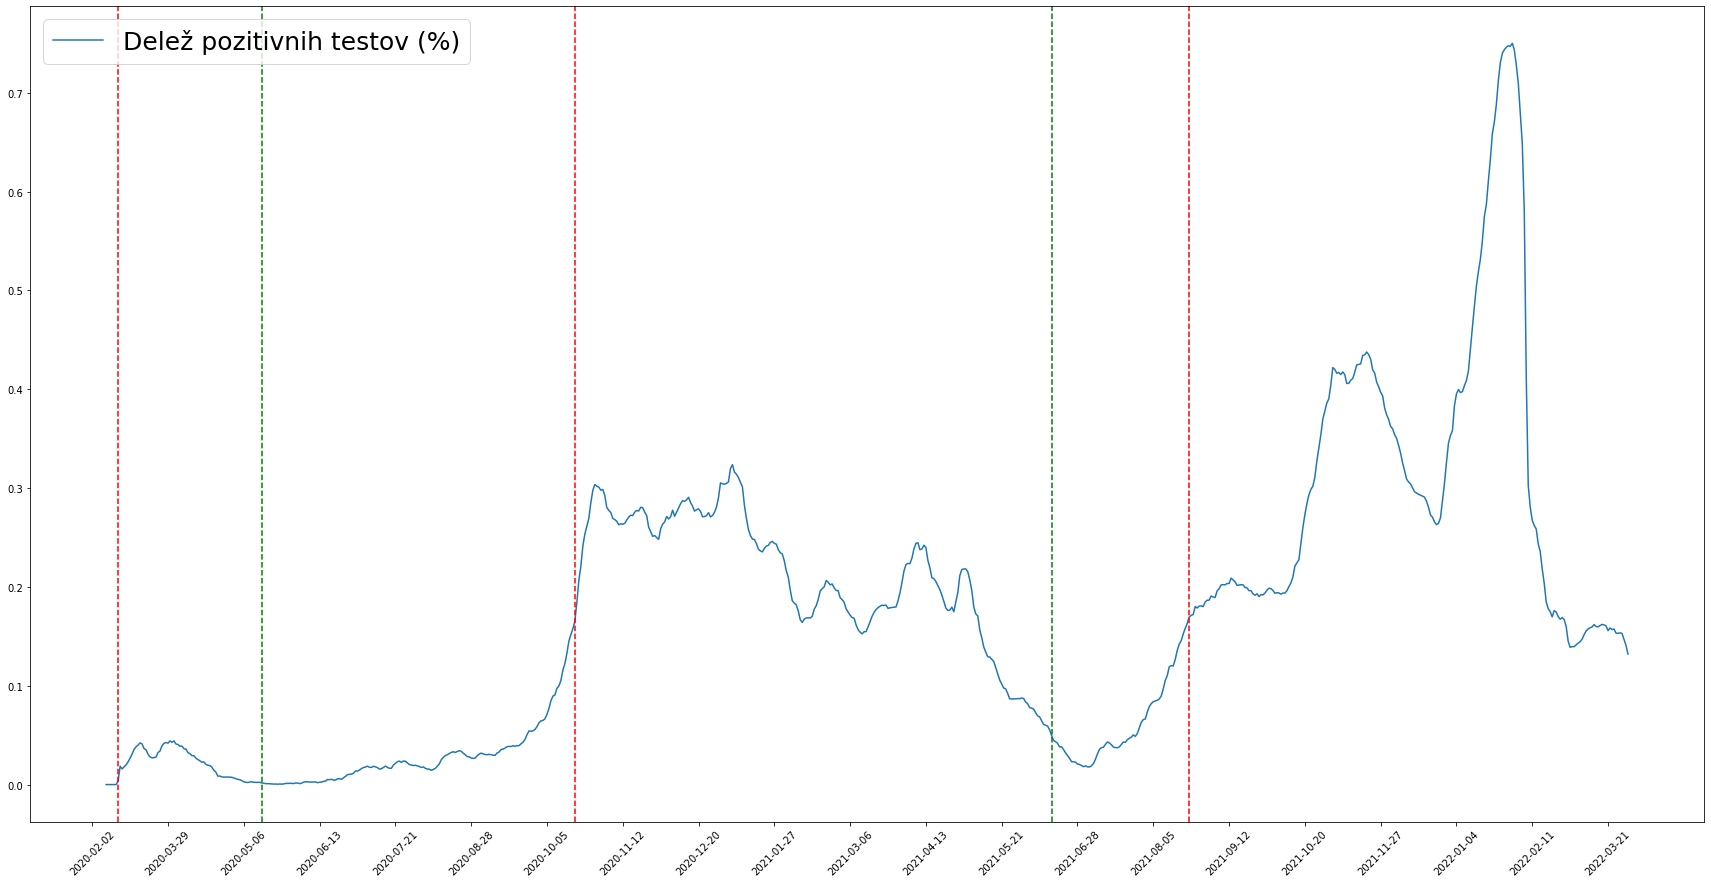

In [ ]:
faze = pd.read_csv("csv/dict-phases.csv")
slabe_faze = [("F1", "prvi primer okužbe"), ("F11", "vlada spet razglasi epidemijo"), ("F18", "novi ukrepi in omejitve")]
dobre_faze = [("F7", "vlada prekliče epidemijo"), ("F17", "epidemija se izteka")]

slabe_faze = [("2020-03-04", "prvi primer okužbe"), ("2020-10-19", "vlada spet razglasi epidemijo"), ("2021-08-23", "novi ukrepi in omejitve")]
dobre_faze = [("2020-05-15", "vlada prekliče epidemijo"), ("2021-06-15", "epidemija se izteka")]




plt.figure(figsize=(30,15))
plt.plot(test_no_df["date"], test_no_df["test.relative.positive"], label="Delež pozitivnih testov (%)")
#plt.plot(test_no_df["date"], test_no_df["test.performed.7days"].div(test_no_df["test.performed.7days"].max()), label = "Število izvedenih testov / največje število izvedenih testov (%)")
for df in dobre_faze:
    plt.axvline(x = df[0], linestyle = "dashed", color="green")
for df in slabe_faze:
    plt.axvline(x = df[0], linestyle = "dashed", color="red")
plt.legend(loc="upper left", prop={'size': 25})
plt.xticks(range(0, len(test_no_df["date"]), len(test_no_df["date"])//20), rotation=45)
plt.show()






In [ ]:
for df in dobre_faze:
    print(faze[faze["id"] == df[0]]["date.from"])
for df in slabe_faze:
    print(faze[faze["id"] == df[0]]["date.from"])

test_no_df["date"]

Series([], Name: date.from, dtype: object)
Series([], Name: date.from, dtype: object)
Series([], Name: date.from, dtype: object)
Series([], Name: date.from, dtype: object)
Series([], Name: date.from, dtype: object)


0      2020-02-02
1      2020-02-09
2      2020-02-16
3      2020-02-23
4      2020-02-24
          ...    
766    2022-03-27
767    2022-03-28
768    2022-03-29
769    2022-03-30
770    2022-03-31
Name: date, Length: 771, dtype: object

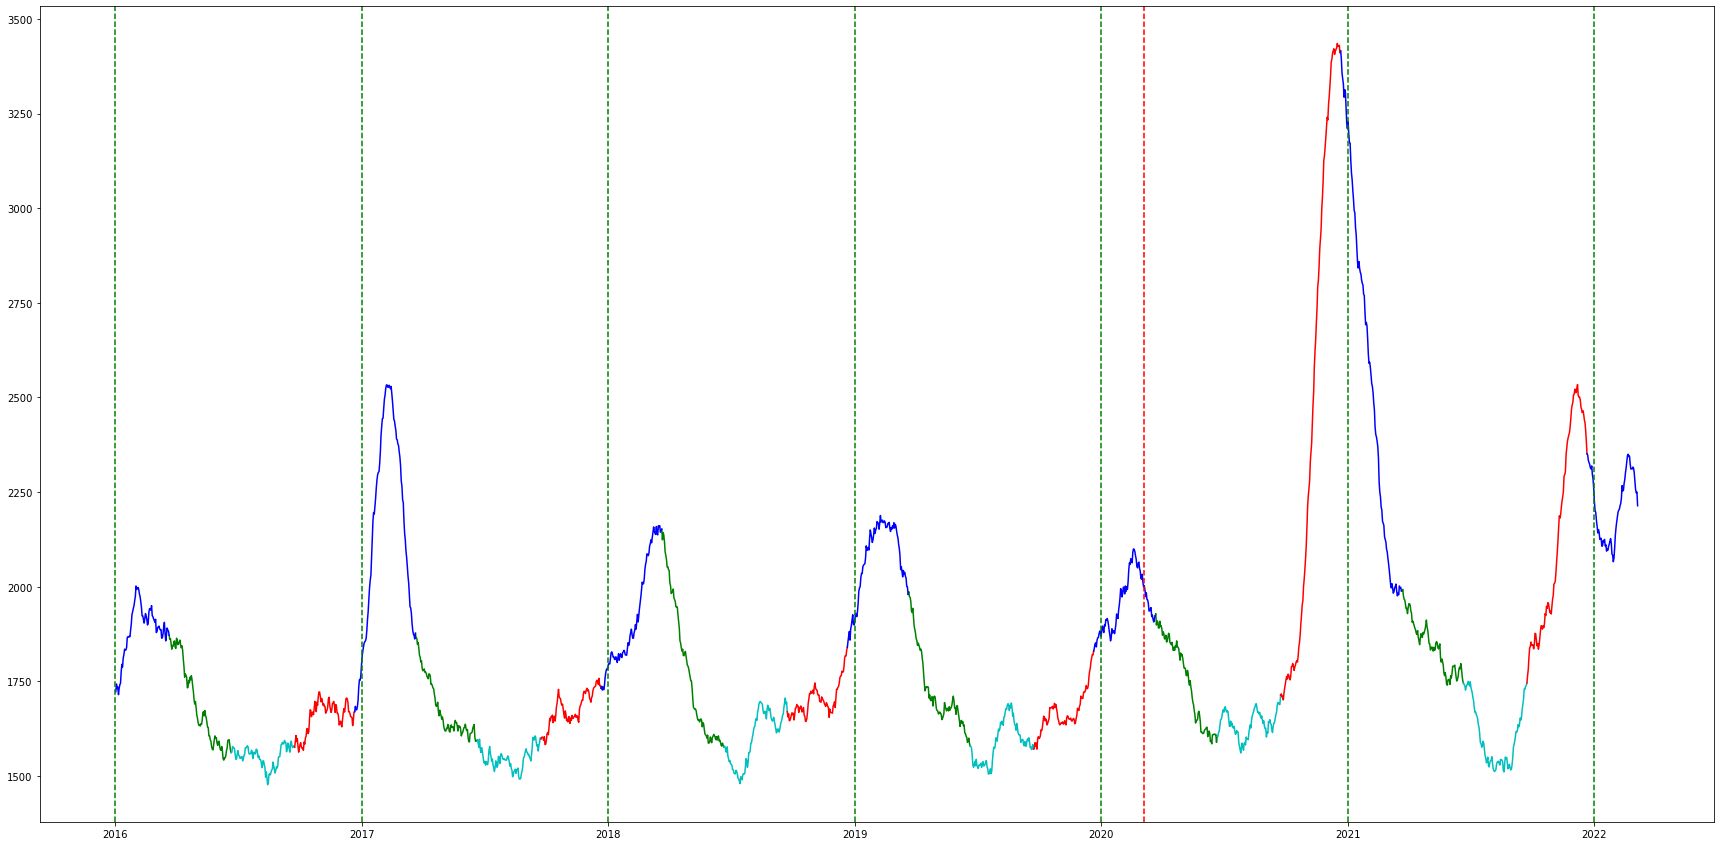

In [16]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

smrti = pd.read_csv("csv/daily_deaths_slovenia.csv")
smrti["dec_smooth"] = smrti["deceased"].rolling(len(smrti), min_periods=1).sum().values
smrti["dec_smooth"] = smrti["dec_smooth"].diff(30)
#print(smrti)
smrti["date"] = pd.to_datetime(smrti["date"], format='%Y-%m-%d')
#smrti = smrti.set_index('date')
#print(smrti)


smrti_reduced = smrti[(smrti['date'] > '2016-01-01') & (smrti['date'] < '2023-02-01')]
smrti_reduced.to_csv("smrti_reduced.csv")
letni_casi = ['03-21', '06-21', '09-23', '12-21']
df_list_pomlad = list()
df_list = list()

for i in range(3):
    l = list()
    for y in range(2015, 2023):
        dff = smrti_reduced[(smrti_reduced["date"] >= datetime.datetime.strptime('{}-{}'.format(y, letni_casi[i]), '%Y-%m-%d')) & (smrti_reduced["date"] <= datetime.datetime.strptime('{}-{}'.format(y, letni_casi[i+1]), '%Y-%m-%d'))]
        if(len(dff)>0):
            l.append(dff)
    df_list.append(l)

l = list()
for y in range(2015, 2023):
    dff = smrti_reduced[(smrti_reduced["date"] >= datetime.datetime.strptime('{}-{}'.format(y, letni_casi[3]), '%Y-%m-%d')) & (smrti_reduced["date"] <= datetime.datetime.strptime('{}-{}'.format(y+1, letni_casi[0]), '%Y-%m-%d'))]
    if(len(dff)>0):
        l.append(dff)
df_list.append(l)

plt.figure(figsize=(30,15))
colors = ['g', 'c', 'r', 'b']
for _col, _df in zip(colors, df_list):
    for d in _df:
        plt.plot(d["date"], d["dec_smooth"], _col, label="Delež pozitivnih testov (%)")

for y in range(2016, 2023):
    plt.axvline(x = datetime.datetime.strptime('{}-01-01'.format(y), '%Y-%m-%d'), linestyle = "dashed", color="green")

plt.axvline(x = datetime.datetime.strptime('2020-03-05', '%Y-%m-%d'), linestyle = "dashed", color="red")

#plt.xticks(range(0, len(smrti_date), len(smrti_date)//20), rotation=45)
plt.show()